<a href="https://colab.research.google.com/github/SHERVIOR/BCI-Pipeline/blob/main/First-until-ICA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INSTALL MNE**

In [28]:
pip install mne

# **Raw EEG (CSV) to FIF file input to FILTER DATA**

In [29]:
import pandas as pd
import mne

# Change Excel file to path directory
xlsx_file = '1_modified.xlsx'


data = pd.read_excel(xlsx_file)

time_stamps = data.iloc[:, 0].values
eeg_channels = data.iloc[:, 1:].values

channel_names = data.columns[1:].tolist()
ch_types = ['eeg'] * len(channel_names)


sfreq = 125

info = mne.create_info(ch_names=channel_names, sfreq=sfreq, ch_types=ch_types)


raw = mne.io.RawArray(eeg_channels.T, info)

fif_file = 'eegdata.fif' #Input for DATA FILTERING section

raw.save(fif_file, overwrite=True)

print(f"FIF file saved at: {fif_file}")

Creating RawArray with float64 data, n_channels=16, n_times=7501
    Range : 0 ... 7500 =      0.000 ...    60.000 secs
Ready.
Overwriting existing file.
Writing /content/eegdata.fif
Closing /content/eegdata.fif
[done]
FIF file saved at: eegdata.fif


<ipython-input-29-575017e54c74>:26: RuntimeWarning: This filename (/content/eegdata.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(fif_file, overwrite=True)


# **PLOT RAW EEG**

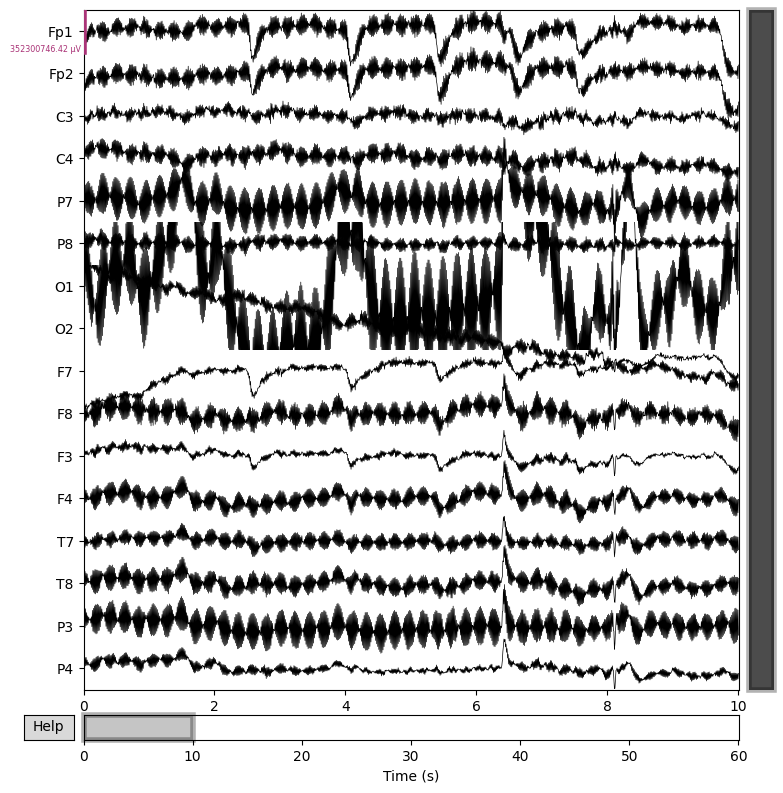

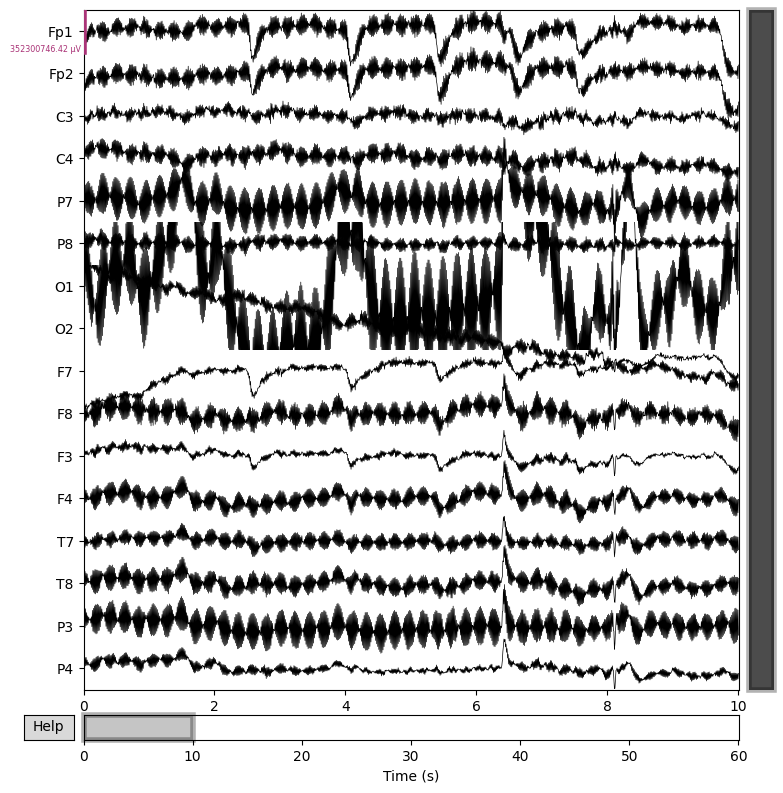

In [21]:
# Plot the raw EEG data
raw.plot(duration=10, n_channels=16, scalings='auto', title='Raw EEG Data', show=True)


# **DATA FILTERING (High Pass Filter, Notch, and Broad Band Pass)**

Opening raw data file eegdata.fif...
Isotrak not found
    Range : 0 ... 7500 =      0.000 ...    60.000 secs
Ready.
Reading 0 ... 7500  =      0.000 ...    60.000 secs...
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

IIR filter parameters
---------------------
Butterworth highpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 8 (effective, after forward-backward)
- Cutoff at 1.00 Hz: -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:


<ipython-input-24-fef06f76a7f9>:24: RuntimeWarning: This filename (eegdata.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fif_file, preload=True)


- Filter order 16 (effective, after forward-backward)
- Cutoffs at 49.38, 50.62 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 59.35, 60.65 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 50.00 Hz: -6.02, -6.02 dB



<Figure size 1000x600 with 0 Axes>

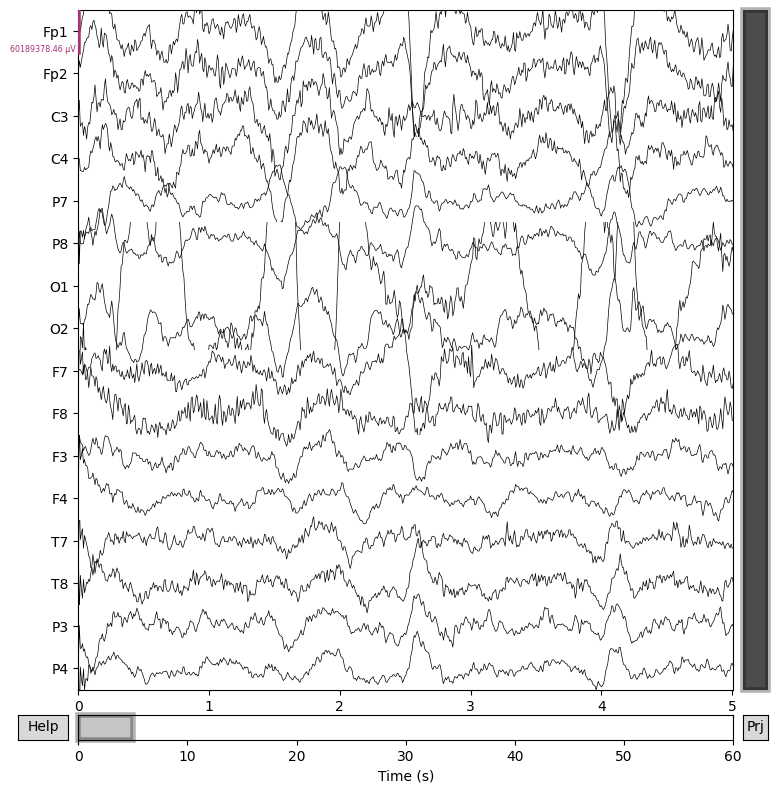

Overwriting existing file.
Writing /content/filtered_data.fif
Closing /content/filtered_data.fif
[done]
Filtered data saved to filtered_data.fif


<ipython-input-24-fef06f76a7f9>:57: RuntimeWarning: This filename (/content/filtered_data.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(filtered_file,overwrite=True)


In [24]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, lfilter_zi
from mne import create_info

# Function to design a bandpass filter
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Function to apply bandpass filter
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    zi = lfilter_zi(b, a) * data[0]
    y, _ = lfilter(b, a, data, zi=zi)
    return y

# Load EEG data
fif_file = 'eegdata.fif'
raw = mne.io.read_raw_fif(fif_file, preload=True)

# Set channel names and montage
channel_names = ['Fp1', 'Fp2', 'C3', 'C4', 'P7', 'P8', 'O1', 'O2', 'F7', 'F8', 'F3', 'F4', 'T7', 'T8', 'P3', 'P4']
montage = mne.channels.make_standard_montage('standard_1020')

raw.rename_channels({raw.ch_names[i]: channel_names[i] for i in range(len(channel_names))})
raw.set_montage(montage)
raw.set_eeg_reference('average', projection=True)

# Filter settings
high_pass_cutoff = 1.0  # High-pass filter cutoff frequency (Hz)
notch_freqs = [50.0, 60.0]  # Notch filter frequencies (Hz)
band_pass_freqs = (0.5, 50.0)  # Band-pass filter frequencies (Hz)

# Apply filters to the raw data
raw.filter(l_freq=high_pass_cutoff, h_freq=None, picks='eeg', method='iir')
for freq in notch_freqs:
    raw.notch_filter(freqs=[freq], picks='eeg', method='iir')
raw.filter(l_freq=band_pass_freqs[0], h_freq=band_pass_freqs[1], picks='eeg', method='iir')

# Plot raw data
plt.figure(figsize=(10, 6))
raw.plot(duration=5, n_channels=16, scalings='auto', title="Raw EEG Data")
plt.show()

# Plot filtered data
#plt.figure(figsize=(10, 6))
#raw.plot(duration=5, n_channels=16, scalings='auto', title="Filtered EEG Data")
#plt.show()

# Save the filtered data
filtered_file = 'filtered_data.fif' #Input for ARTIFACT REMOVAL section
raw.save(filtered_file,overwrite=True)

print(f"Filtered data saved to {filtered_file}")


# **ARTIFACT REMOVAL (Independent Component Analysis)**

Opening raw data file filtered_data.fif...
    Read a total of 1 projection items:
        Average EEG reference (1 x 16)  idle
    Range : 0 ... 7500 =      0.000 ...    60.000 secs
Ready.
Reading 0 ... 7500  =      0.000 ...    60.000 secs...
Fitting ICA to data using 16 channels (please be patient, this may take a while)
Selecting by number: 16 components


<ipython-input-26-5708582efd49>:5: RuntimeWarning: This filename (filtered_data.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif('filtered_data.fif', preload=True)


Fitting ICA took 2.8s.


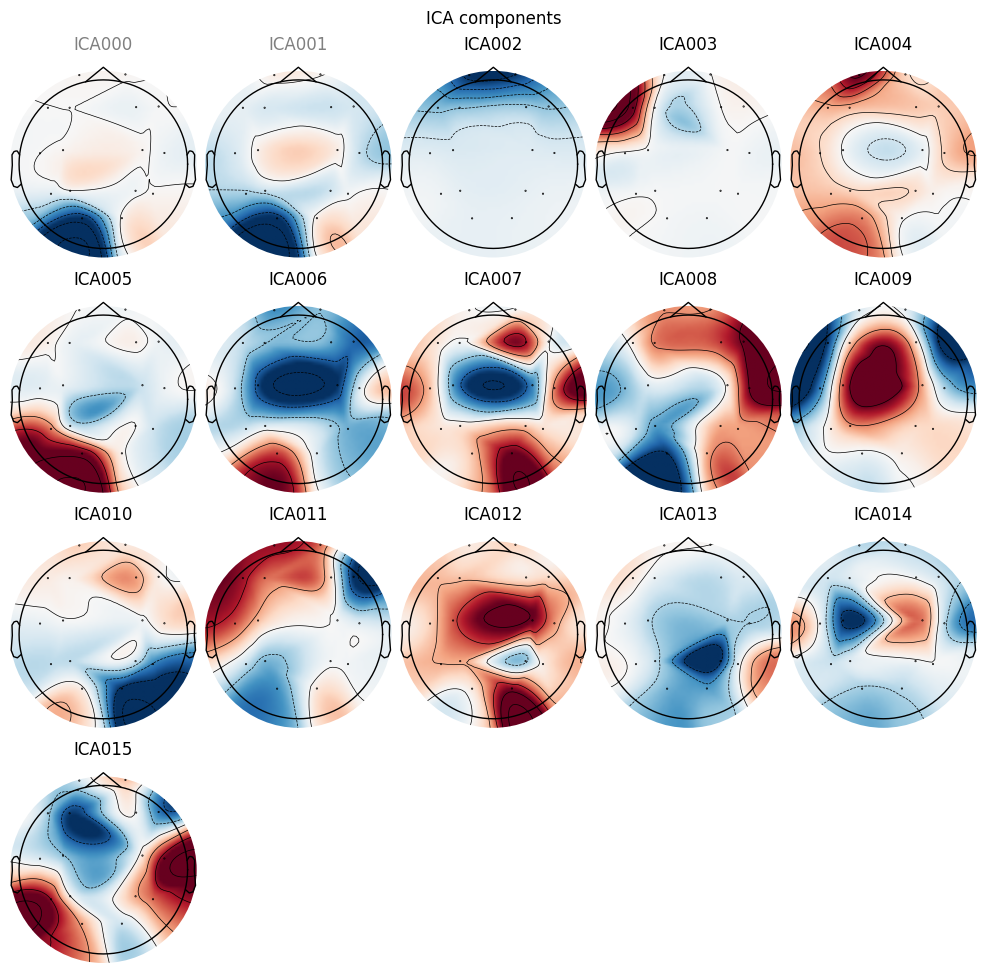

Applying ICA to Raw instance
    Transforming to ICA space (16 components)
    Zeroing out 2 ICA components
    Projecting back using 16 PCA components


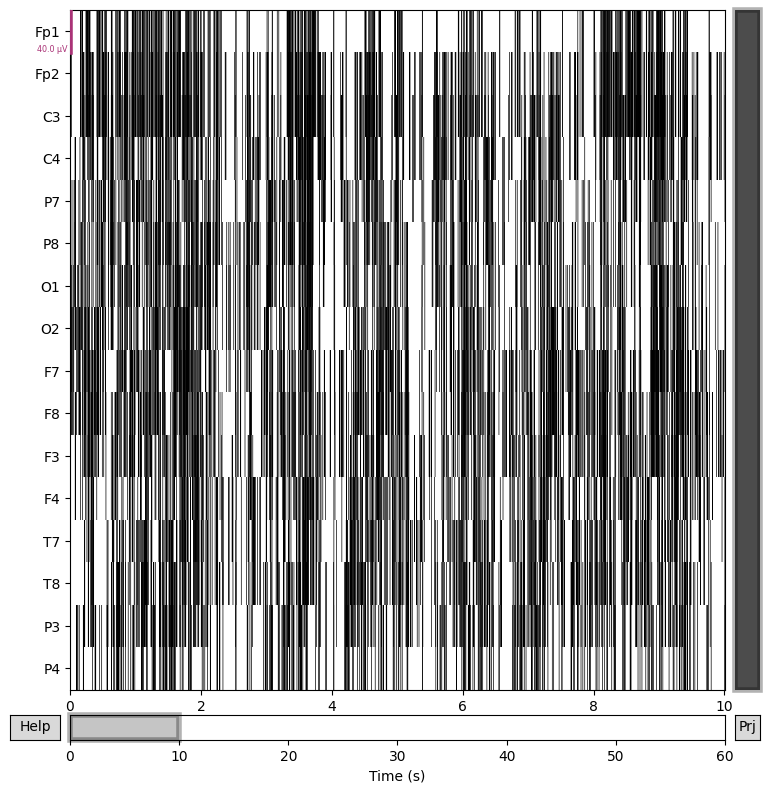

Overwriting existing file.
Writing /content/cleaned_data.fif
Closing /content/cleaned_data.fif
[done]


<ipython-input-26-5708582efd49>:27: RuntimeWarning: This filename (/content/cleaned_data.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_cleaned.save('cleaned_data.fif', overwrite=True)


[PosixPath('/content/cleaned_data.fif')]

In [26]:
import mne
from mne.preprocessing import ICA

# Load the raw EEG data (FIF file)
raw = mne.io.read_raw_fif('filtered_data.fif', preload=True)

# Set the number of ICA components based on the number of channels (16 or fewer)
n_components = min(16, raw.info['nchan'])

# Perform ICA on the raw data
ica = ICA(n_components=n_components, random_state=97, max_iter=800)
ica.fit(raw)

# Exclude specific components based on manual inspection (adjust component indices)
ica.exclude = []  # Adjust based on your analysis of the components

# Optional: Plot the ICA components to visually inspect the rejected components
ica.plot_components()

# Apply ICA to the raw data to remove the artifact components
raw_cleaned = ica.apply(raw)

# Visualize the cleaned data
raw_cleaned.plot()

# Save the cleaned data to a new FIF file for further processing
raw_cleaned.save('cleaned_data.fif', overwrite=True)

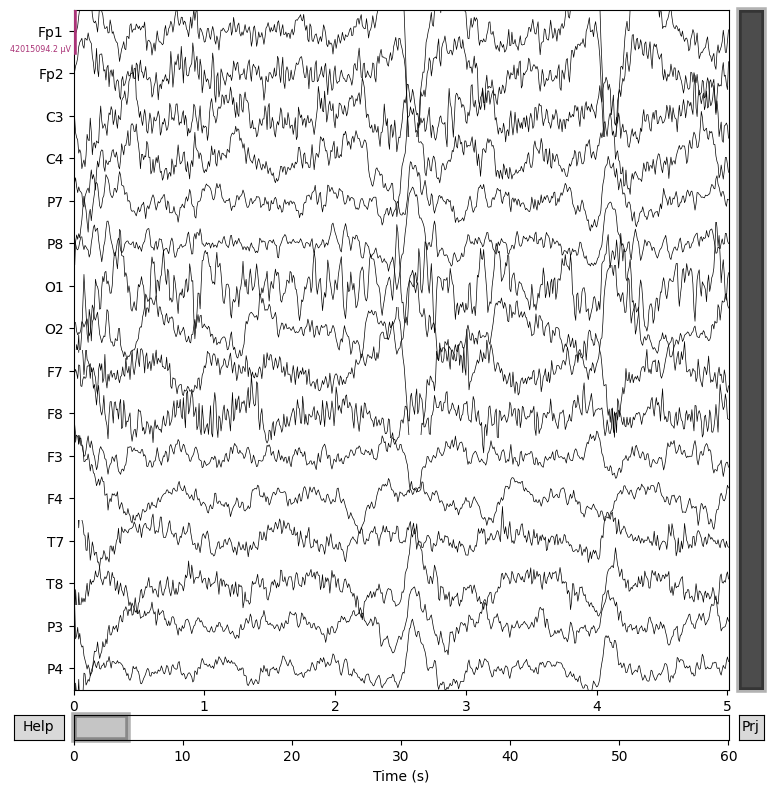

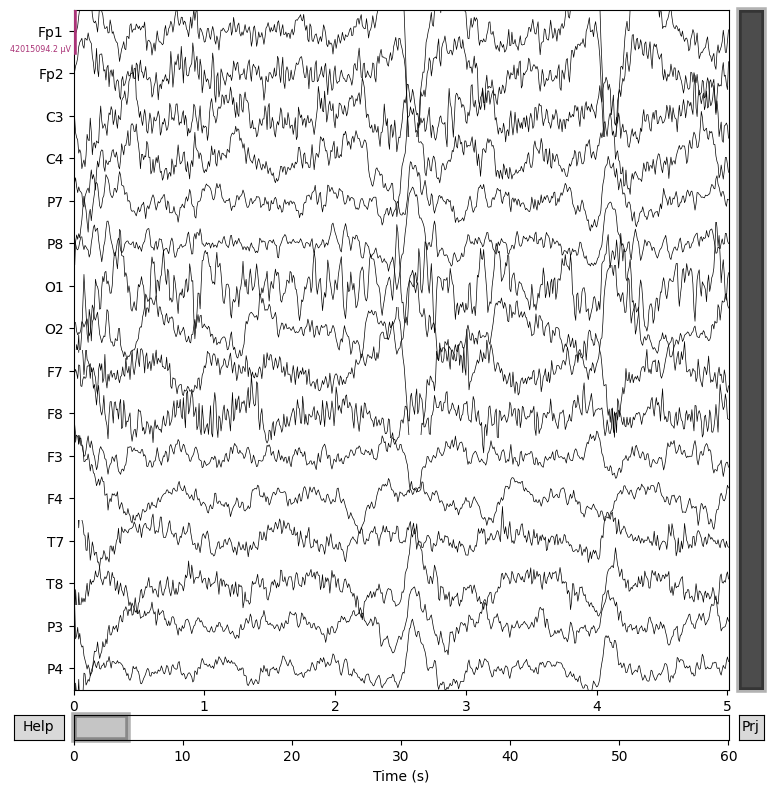

In [27]:
# Visualize the cleaned data (raw_cleaned)
raw_cleaned.plot(duration=5, n_channels=16, scalings='auto', title='Cleaned EEG Data')